## MATH 157 Final Presentation
#### Topic: Differential equations and modeling of endemic diseases, Part 2, Julia
#### By: Zhaoyang Jia

*Disclaimer: This presentation models disease spread and control strategies base on theoretical approaches, but in the real world, the problem is more complex. Please follow your local guidelines on disease controls*

**Try to install the package first, but you may not be able to install it as the 1GB allocated for each student may not be sufficient for the package installation**

In [49]:
#import Pkg
#Pkg.add("OrdinaryDiffEq")
# technically, you can use the full "DifferentialEquations" package, but we do not have the enough resource on CoCalc to install it...

### DifferentialEquations package in Julia ###
- Although the DifferentialEquations package has a slightly harder syntax than SageMath's built in desolve(), in my practice, the DIfferentialEquations numerical solve is far more powerful and easier to use than SageMath's. Also, the native plotting has a significantly higher image quality.
- We will first run through the similar examples as in the beginning of SageMath. This should provide a contrast in the syntax. Only numerical solve will be demonstrated here.

In [50]:
using OrdinaryDiffEq
using Plots

In [51]:
tspan = (0.0,5.0)
f(y,p,t) = 2*y - 2
y_0 = 2
prob = ODEProblem(f,y_0,tspan)
# Tsit5() is the most standard and rudimentary algorithm for numerical solve in Julia; it is recommended to be tried first, before other algorithms
soln = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 16-element Vector{Float64}:
 0.0
 0.08706376009466638
 0.24882812042884891
 0.4455557368990496
 0.6852511351168109
 0.961096269447357
 1.272880589969562
 1.6165887863621
 1.989809050887594
 2.389371366936162
 2.81248486816306
 3.256364037978105
 3.718448296918362
 4.196387579826856
 4.6880536089707965
 5.0
u: 16-element Vector{Float64}:
     2.0
     2.1902073318310045
     2.6448615581450827
     3.4378374550720685
     4.937325632530322
     7.835918092569971
    13.752872806447154
    26.359853326506947
    54.495527304676166
   119.95046554095222
   278.2477304481318
   674.601476904425
  1698.2536373120383
  4415.257567058251
 11801.138791155927
 22022.10264981157

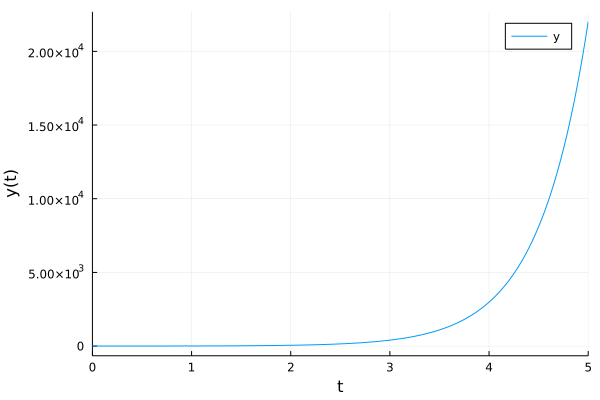

In [52]:
plot(soln, xaxis="t", yaxis="y(t)", label = "y")

- Use "in-place" update can greatly increase the efficiency of the solver. Instead of letting the solver output the solution 2D vector directly, we can write a function to update the solution 2D vector. (It is 2D because we have a system of equations, and for each value of the independent variable, we have multiple points respective to each dependent variable.)
- This function sort of acts as a lambda function fed into solve(). The "!" indicates this function iterates in-place.

In [53]:
function our_system!(du,u,p,t)
    du[1] = - u[1]
    du[2] = - 3 * u[2]
end
# we see that Julia requires all initial conditions be valued at t=0
u_0 = [1;2]      # u[1] = 1, u[2] = 2 @ t=0
tspan = (0.0,5.0)
prob = ODEProblem(our_system!, u_0, tspan)     # feeding in our psudo-lambda function as our system ODE
soln = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 22-element Vector{Float64}:
 0.0
 0.06898673034921085
 0.173758450480286
 0.29389051080340295
 0.44194565039982664
 0.6079834681085609
 0.794775272642553
 0.9970805298765366
 1.2142153771979833
 1.4431082285585284
 1.6824280119373634
 1.9304647792417402
 2.1865610367327144
 2.4507665292298295
 2.7248228128300056
 3.0126581075482846
 3.320868449579869
 3.658447972866972
 4.036770189449718
 4.470448743152101
 4.978042061907136
 5.0
u: 22-element Vector{Vector{Float64}}:
 [1.0, 2.0]
 [0.9333390650856237, 1.626104045283808]
 [0.8404998955708421, 1.1875257888234563]
 [0.7453580958784488, 0.8281807458613994]
 [0.642784570367125, 0.5311622455736691]
 [0.5444476605903052, 0.32277564854539925]
 [0.45168273221373234, 0.18430464415901793]
 [0.36895502870216174, 0.10045285586091478]
 [0.29694291856845556, 0.052368634449859904]
 [0.23619248604243143, 0.02635516904274768]
 [0.18592201830526825, 0.012855270934163068]
 [0.14

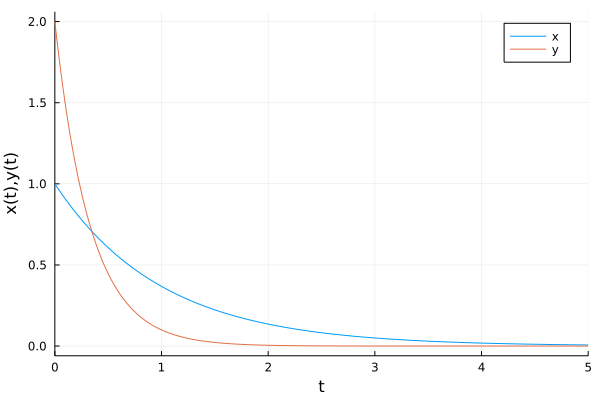

In [54]:
plot(soln, vars=(1), xaxis="t", yaxis="x(t),y(t)", label = "x")
plot!(soln, vars=(2), label = "y")  # vars(1) and vars(2) accesses the 1st and 2nd columns of the soln vector

### Solving the SIR Model ###

- The saveat option in solve() tells the solver to only save the points at our specified intervals. The solver, in the background, is still going to be computing at a much smaller step-size to ensure the higher accuracy of the numerical solve, but we only sample out the points that we are interested in.
- By setting saveat = 1, we effectively gather the daily rates of S,I, and R population changes. This helps the summation process greatly. eg. If we want to know how many people got sick throughout the way, we can just sum up our solution's dI/dt column, which is equivalent to getting the Riemman sum of the area-under-the-curve = total people who got sick.

In [55]:
S_0 = 40000000
I_0 = 3000
R_0 = 0
t_0 = 0

a = 5901/((4032*7 + 3268*7)*S_0)
b = 1/14

function SIR!(du,u,p,t)
    # u[1] = S; u[2] = I; u[3] = R
    du[1] = -a * u[1] * u[2]
    du[2] = a * u[1] * u[2] - b * u[2]
    du[3] = b * u[2]
end

tspan = (0.0, 365.0)
u_0 = [S_0, I_0, R_0]
prob = ODEProblem(SIR!, u_0, tspan)
soln = solve(prob, Tsit5(), saveat=1);    # save interval of once per day, hide output by ";"

retcode: Success
Interpolation: 1st order linear
t: 366-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
 365.0
u: 366-element Vector{Vector{Float64}}:
 [4.0e7, 3000.0, 0.0]
 [3.999964581952211e7, 3135.104987673973, 219.07549021431743]
 [3.9999275692077324e7, 3276.291001146905, 448.01692153525715]
 [3.999888890023066e7, 3423.831427519979, 687.2683418224223]
 [3.9998484694101125e7, 3578.01199983796, 937.2938990373202]
 [3.999806229069077e7, 3739.1310518039795, 1198.5782574244247]
 [3.9997620871821515e7, 3907.500300329379, 1471.6278781560652]
 [3.99971595815349e7, 4083.4458312330135, 1756.972633874227]
 [3.9996677526010744e7, 4267.308130068971, 2055.165859191174]
 [3.999617377122217e7, 4459.442969834355, 2366.785808007961]
 [3.999564734275493e7, 4660.221482480259, 2692.4357625971934]
 [3.9995097222459204e7, 4870.031425843444, 3032.7461149605

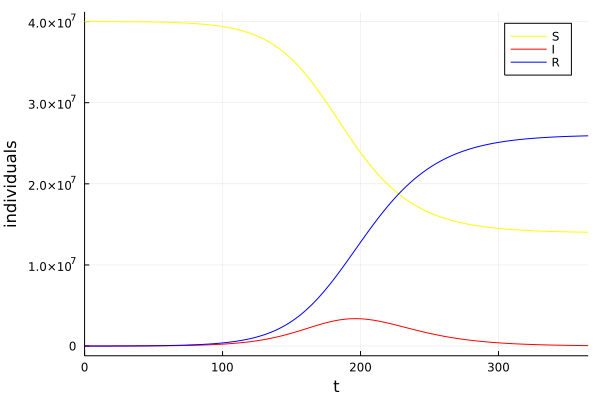

In [56]:
plot(soln, vars=(1), xaxis="t(days)", yaxis="individuals", label = "S", color = "yellow")
plot!(soln, vars=(2), label = "I", color = "red")
plot!(soln, vars=(3), label = "R", color = "blue")

In [57]:
no_safety_measure_ill = soln[2,:];     # save the rate of illness for later use

### Separating the solution ###
- We want to see what will happen if certain measures are implemented in the middle of a pandemic. It would be nice to super-position two set of SIR models: the first system has the original constants for the disease, and the second system is the follow up days after the non-safety-measured days of the first system.
- Analyze the solution outputs by solve(): We see that the solution has two components, the time stamp array, and the respective 2D-array of numerical values of the dependent variables.

In [58]:
soln

retcode: Success
Interpolation: 1st order linear
t: 366-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
 365.0
u: 366-element Vector{Vector{Float64}}:
 [4.0e7, 3000.0, 0.0]
 [3.999964581952211e7, 3135.104987673973, 219.07549021431743]
 [3.9999275692077324e7, 3276.291001146905, 448.01692153525715]
 [3.999888890023066e7, 3423.831427519979, 687.2683418224223]
 [3.9998484694101125e7, 3578.01199983796, 937.2938990373202]
 [3.999806229069077e7, 3739.1310518039795, 1198.5782574244247]
 [3.9997620871821515e7, 3907.500300329379, 1471.6278781560652]
 [3.99971595815349e7, 4083.4458312330135, 1756.972633874227]
 [3.9996677526010744e7, 4267.308130068971, 2055.165859191174]
 [3.999617377122217e7, 4459.442969834355, 2366.785808007961]
 [3.999564734275493e7, 4660.221482480259, 2692.4357625971934]
 [3.9995097222459204e7, 4870.031425843444, 3032.7461149605

We can extract the timestamp, and the corresponding solution for a specific variable

In [59]:
soln.t, soln[1,:]   # timestamp, and first variable

([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  356.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 363.0, 364.0, 365.0], [4.0e7, 3.999964581952211e7, 3.9999275692077324e7, 3.999888890023066e7, 3.9998484694101125e7, 3.999806229069077e7, 3.9997620871821515e7, 3.99971595815349e7, 3.9996677526010744e7, 3.999617377122217e7  …  1.405576725320883e7, 1.405286356783895e7, 1.4050048686026022e7, 1.4047319907654133e7, 1.4044674607323857e7, 1.4042110234352248e7, 1.4039624312772842e7, 1.4037214441335658e7, 1.4034878293507196e7, 1.4032613617470436e7])

### Approach to model a change in the spread of a disease due to a change in conditions ###
- Our approach is to set up two systems, with different parameters. The change in parameters represent the theoretic effect of the safety measures.
- We will set the endpoint of the non-safety-measured days as the initial condition of the safety-measured days, modeled by the second system ODE.
- At the end, we will stack the rates of our first system ODE on top of the rates of our second system ODE; this gives us a continuous span of modeled outbreak, with no safety measure to begin with, and followed by a change in the safety measure (but inheriting the state of the population at the end of the non-safety measured days).

### Simple Preventative Measures ###


<img src="KN95-Masks4Tritons.jpeg" width="700">

- Social distancing, masking, and hand-sanitizing can lower the rate of infection by eliminating contact with the virus.
- We can assume that by implementing these measures, we reduce the spread of the disease: $\alpha_1 = \frac{1}{2} \alpha_0$

In [60]:
S_0 = 40000000
I_0 = 3000
R_0 = 0
t_0 = 0

a_1 = 5901/((4032*7 + 3268*7)*S_0)
b = 1/14

# suppose social distancing, masking, and hand-sanitizing reduce the transfection rate by half
a_2 = a_1 / 2

# the function input has to have strictly 4 parameters: du, u, p, t
# try to stick with the 4-parameters can reduce werid behavior
# inputing the constants as another parameter does not work, so we create two systems instead
function SIR1!(du,u,p,t)
    # u[1] = S; u[2] = I; u[3] = R; C[1] = a; C[2] = b
    du[1] = -a_1 * u[1] * u[2]
    du[2] = a_1 * u[1] * u[2] - b * u[2]
    du[3] = b * u[2]
end

function SIR2!(du,u,p,t)
    # u[1] = S; u[2] = I; u[3] = R; C[1] = a; C[2] = b
    du[1] = -a_2 * u[1] * u[2]
    du[2] = a_2 * u[1] * u[2] - b * u[2]
    du[3] = b * u[2]
end

tspan_1 = (0.0, 150.0)
tspan_2 = (0.0, 215.0)
u_0 = [S_0, I_0, R_0]
prob_1 = ODEProblem(SIR1!, u_0, tspan_1)
soln_1 = solve(prob_1, Tsit5(), saveat=1);

u_1 = soln_1[1:3, end] # save the end condition after period 1, and use it as the precondition of period 2
prob_2 = ODEProblem(SIR2!, u_1, tspan_2)
soln_2 = solve(prob_2, Tsit5(), saveat=1);

In [61]:
t = [Float64(i) for i in 0:366]    # set up the continuous days of the 1-year span
points = [transpose(soln_1[1:3,:]); transpose(soln_2[1:3,:])]; # stack the two matrices and cast to a vector

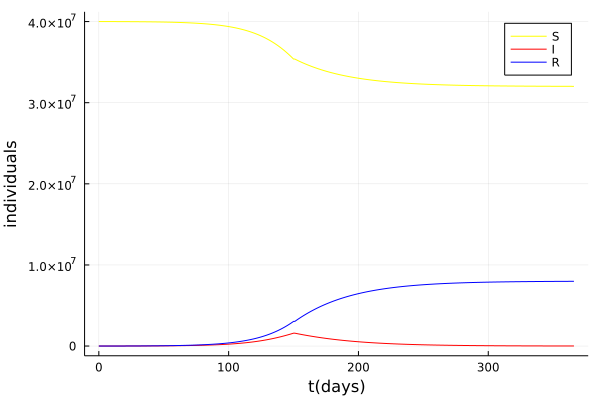

In [62]:
plot(t, points[:,1], xaxis="t(days)", yaxis="individuals", label = "S", color = "yellow")
plot!(t, points[:,2], label = "I", color = "red")
plot!(t, points[:,3], label = "R", color = "blue")

- We see an obvious change in the rate of dI/dt, immediately after the implementation of the safety measures, on day 150.
- Our dI/dt is no longer going down because we deplete our pool of S. In another word, we are not stoping the spread by getting most people sick, so the disease has fewer people to be spread to. Rather, we are stoping the spread by reducing its contagiousness.
- This makes sense since we $\alpha_1 = \frac{1}{2} \alpha_0$, meaning $R_{0,1} = \frac{1}{2} R_{0,0}$. Since our original $R_0 = 1.6$, our new $R_0$ is below 1. This means, on average one patient spreads to fewer than 1 other person, in itself, a conserved series.

In [63]:
# total sick of the super-positioned model / total sick of the free spread model
sum(points[2,:]) / sum(no_safety_measure_ill)

0.11024855702228115

We see that although we implemented the safety measures late into the spread (day 150), we still end up with only 1/10 of the people sick, compared to if we do not impose any measures. This illustrates the nature of exponential growth: any time before the growth sets forth to its obvious high-growth phase, we are not too late and have time to act. As long as we prevent that high-growth phase, we can stop most of the potential damage.

### Quarantine ###


<img src="quarenteen.jpeg" width = 375>

- By promoting rapid testing, we can quickly identify the sick patients and remove them from contacting the susceptible
- instead of our original $\beta_0 = 1/14$ which is based on the 14-day recovery period, we remove the sick from the population on the 6th day of their spreadable period (not 6th day of initial contracting the disease; remember, the days of being in group-I starts when they are contagious), thus, we have $\beta_1 = 1/6$
- 6 comes from a reasonable length of when they can be tested positive

In [64]:
S_0 = 40000000
I_0 = 3000
R_0 = 0
t_0 = 0

a = 5901/((4032*7 + 3268*7)*S_0)

# quarentine by rapid testing, we stop the spread, on average, by the 6th day of the person being contagious
b_1 = 1/14
b_2 = 1/6

# the function input has to have strictly 4 parameters: du, u, p, t
# try to stick with the 4-parameters can reduce werid behavior
# inputing the constants as another parameter does not work, so we create two systems instead
function SIR1!(du,u,p,t)
    # u[1] = S; u[2] = I; u[3] = R; C[1] = a; C[2] = b
    du[1] = -a * u[1] * u[2]
    du[2] = a * u[1] * u[2] - b_1 * u[2]
    du[3] = b_1 * u[2]
end

function SIR2!(du,u,p,t)
    # u[1] = S; u[2] = I; u[3] = R; C[1] = a; C[2] = b
    du[1] = -a * u[1] * u[2]
    du[2] = a * u[1] * u[2] - b_2 * u[2]
    du[3] = b_2 * u[2]
end

tspan_1 = (0.0, 150.0)
tspan_2 = (0.0, 215.0)
u_0 = [S_0, I_0, R_0]
prob_1 = ODEProblem(SIR1!, u_0, tspan_1)
soln_1 = solve(prob_1, Tsit5(), saveat=1);

u_1 = soln_1[1:3, end] # save the end condition after period 1, and use it as the precondition of period 2
prob_2 = ODEProblem(SIR2!, u_1, tspan_2)
soln_2 = solve(prob_2, Tsit5(), saveat=1);

In [65]:
t = [Float64(i) for i in 0:366]    # set up the continuous days of the 1-year span
points = [transpose(soln_1[1:3,:]); transpose(soln_2[1:3,:])]; # stack the two matrices and cast to a vector

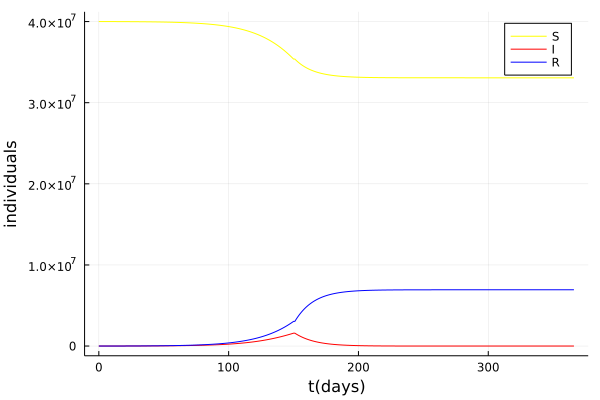

In [66]:
plot(t, points[:,1], xaxis="t(days)", yaxis="individuals", label = "S", color = "yellow")
plot!(t, points[:,2], label = "I", color = "red")
plot!(t, points[:,3], label = "R", color = "blue")

We see a similar effect compared to the "simple preventative measures". 
- However, this reduction in dI/dt is driven by a reduction in I, which is resulted from a higher recovery rate
- Whereas the previous reduction is driven by a decrease in $\alpha$
- they have similar effect because $dI/dt = -\alpha SI$, $\alpha$ and $I$ are similarly influential

### Vaccination ###


<img src="vaccine.jpeg" width = 350>

- vaccination is equivalent to a pre-acquired immunity, putting an individual directly into the R-group, without contracting the disease
- we will assume a vaccine-efficacy of 95%, meaning 95% of people who take it will become R-group
- we will assume a vaccination rate of 90%
- we assume people have taken the vaccine before the second wave came in October, 2020 (even though it was not available back then; we just want to see the potential effect)

In [71]:
S_0 = 40000000
R_0 = 0
vaccinnated = S_0 * .90
effective = vaccinnated * .95

# update the preconditions
S_1 = S_0 - effective
R_1 = R_0 + effective

print("we have ")
print(Int(effective))
println(" people turned into R-group without contracting the disease directly")

we have 34200000 people turned into R-group without contracting the disease directly


In [68]:
I_0 = 3000
t_0 = 0

a = 5901/((4032*7 + 3268*7)*S_0)
b = 1/14

u_0 = [S_1, I_0, R_1]
function SIR!(du,u,p,t)
    # u[1] = S; u[2] = I; u[3] = R; C[1] = a; C[2] = b
    du[1] = -a * u[1] * u[2]
    du[2] = a * u[1] * u[2] - b * u[2]
    du[3] = b * u[2]
end

tspan = (0.0, 365.0)
prob_1 = ODEProblem(SIR!, u_0, tspan)
soln_1 = solve(prob_1, Tsit5(), saveat=1);

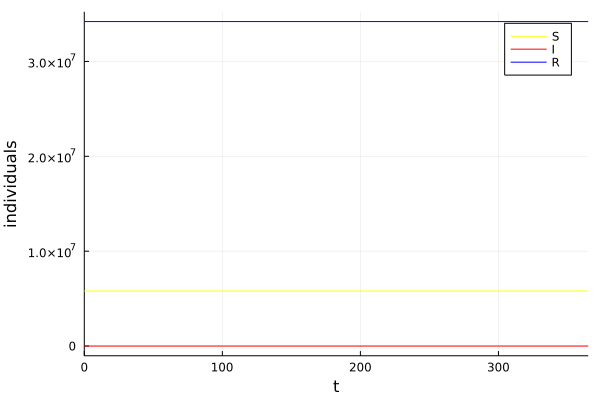

In [69]:
plot(soln_1, vars=(1), xaxis="t(days)", yaxis="individuals", label = "S", color = "yellow")
plot!(soln_1, vars=(2), label = "I", color = "red")
plot!(soln_1, vars=(3), label = "R", color = "blue")

In [70]:
print("in the free spread model, we have number of sick: ")
println(sum(no_safety_measure_ill))
print("in the pre-vaccinated model, we have number of sick: ")
println(sum(soln_1[2,:]))

in the free spread model, we have number of sick: 3.628437512512334e8
in the pre-vaccinated model, we have number of sick: 56372.94283212748


Based on the curves, we see that with already-in-place pre-immunization, the disease never had its exponential phase. With 3000 initial patients, we only end up with 56000 people sick, an astronomical step up against the free spread model.

### Limitations
- Assumptions: eg. recovered individuals cannot get the disease again
    - We can add a constant to split the ones who exit the I-state into the R-state and S-state, where a unique constant will model how often one can get the disease again.
- Assume of a constantly commuting population, without a sense of local community
    - Herd Immunity Effect is greatly reduced
    - in reality, the population is not totally fluid. A sick patient cannot meet everyone in the population. Thus, having enough immune people around them can stop the spread because they do not end up getting any other people sick.

<img src="herd.png" width="500">

- Treat all individuals as the same contagiously level
    - use of more sophisticated model can reduces this. eg. We can use SEIR model to separate the exposed/asymptomatic but still contagious crowd from the illed crowd, as the asymptomatic is ususally a lot more contagious than the symptomatic (because they walk around without knowing themselves are ill).

### Further Resources ###
- here is a real life SIR model built for the COVID 19 at the half a year after the outbreak, to this day, we see that they greatly exaggerate the $R_0$, potentially ignoring the extent government are willing to impose safety measures
    - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7321055/#:~:text=Assuming%20the%20published%20data%20are,the%20number%20of%20susceptible%20individuals.
- These are great place to start if you are interested in numerical approximation of ODE
    - Euler's method: https://www.youtube.com/watch?v=ukNbG7muKho
    - rk4: https://www.youtube.com/watch?v=1YZnic1Ug9g&ab_channel=LearnChemE